In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score

In [7]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

## Part 1

What is an optimization problem? 

- We aim to find the best state, according to some objective function. 
- An example of a state is the weights used in a machine learning model, such as a neural network
- State is represented by a one-dimensional vector 
- "Best" state is defined using the Cost Function/Fitness Function/Objective Function 
- Function takes in a State Array as Input and returns a Fitness Value as Output


We will make 3 steps to solve an optimization problem with mlrose:
 - 1) Define fitness function object
 - 2) Define an optimization problem object
 - 3) Select and run a randomized optimization algorithm

#### 1) Define Fitness Function Object

In [8]:
#fitness1 = mlrose.FourPeaks(t_pct=0.1)

#fitness2 = mlrose.MaxKColor(edges=edges)

fitness3 = mlrose.FlipFlop()

#### 2) Define an Optimization Problem Object

In [9]:
#this requires a LENGTH of Edges - we can tune this 

problem3 = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness3, maximize = True, max_val = 2)

In [10]:
problem3.length

100

#### 3) Select and Run Randomized Optimization Algorithm

##### Find Optimzal Parameters for RHC, SA, GA, Mimic for the Flip Flop Problem

##### Random Hill Climbing

restarts

In [41]:
restarts_list = np.arange(0, 11, 1)

restarts_probs = [.25, .50, .75, 1.0, 2.0]
problem_length = np.array(problem3.length)

restarts_list2 = np.dot(restarts_probs, problem_length)

restarts_list_full =  np.concatenate((restarts_list, restarts_list2))

for num in restarts_list_full:
    
    best_state, best_fitness = mlrose.random_hill_climb(problem=problem3, restarts = int(num),
                                                   max_attempts = 10, max_iters = 1000,
                                                        random_state = 42)
    #print(best_state)
    print("restarts:",num, "best_fitness:",best_fitness)


restarts: 0.0 best_fitness: 72.0
restarts: 1.0 best_fitness: 72.0
restarts: 2.0 best_fitness: 72.0
restarts: 3.0 best_fitness: 72.0
restarts: 4.0 best_fitness: 72.0
restarts: 5.0 best_fitness: 72.0
restarts: 6.0 best_fitness: 72.0
restarts: 7.0 best_fitness: 72.0
restarts: 8.0 best_fitness: 72.0
restarts: 9.0 best_fitness: 74.0
restarts: 10.0 best_fitness: 74.0
restarts: 25.0 best_fitness: 74.0
restarts: 50.0 best_fitness: 74.0
restarts: 75.0 best_fitness: 74.0
restarts: 100.0 best_fitness: 78.0
restarts: 200.0 best_fitness: 78.0


max_attempts

In [82]:
max_attempts_list = [10, 100, 1000, 10000, 100000]

for num in max_attempts_list:
    
    best_state, best_fitness = mlrose.random_hill_climb(problem=problem3, restarts = 100,
                                                   max_attempts = int(num), max_iters = 1000,
                                                   random_state = 42)
    #print(best_state)
    print(best_fitness)


78.0
86.0
88.0
88.0
88.0


max_iters

In [13]:
max_iters_list = [10, 100, 1000, 10000, 100000]

for num in max_iters_list:
    
    best_state, best_fitness = mlrose.random_hill_climb(problem=problem3, restarts = 1,
                                                   max_attempts = 10, max_iters = int(num),
                                                    random_state = 42)
    #print(best_state)
    print(best_fitness)


58.0
72.0
72.0
72.0
72.0


##### Simulated Annealing

schedule

In [14]:
scheduleG = mlrose.GeomDecay()
scheduleA = mlrose.ArithDecay()
scheduleE = mlrose.ExpDecay()

best_state, best_fitness = mlrose.simulated_annealing(problem=problem3, schedule = scheduleG,
                                               max_attempts = 10, max_iters = 1000,
                                                    random_state = 42)

#print(best_state)

print(best_fitness)

88.0


In [15]:
best_state, best_fitness = mlrose.simulated_annealing(problem=problem3, schedule = scheduleA,
                                               max_attempts = 10, max_iters = 1000,
                                                    random_state = 42)

#print(best_state)

print(best_fitness)

67.0


In [16]:
best_state, best_fitness = mlrose.simulated_annealing(problem=problem3, schedule = scheduleE,
                                               max_attempts = 10, max_iters = 1000,
                                                    random_state = 42)

#print(best_state)

print(best_fitness)

85.0


schedule tweaks

In [39]:
scheduleG = mlrose.GeomDecay()
scheduleA = mlrose.ArithDecay()
scheduleE = mlrose.ExpDecay()

decays = np.arange(0.09, 1.09, .10)

for d in decays:
    scheduleNew = mlrose.GeomDecay(init_temp=1.0, decay = d, min_temp = 0.001)
    
    best_state, best_fitness = mlrose.simulated_annealing(problem=problem3, schedule = scheduleNew,
                                                   max_attempts = 10, max_iters = 1000,
                                                        random_state = 42)

    #print(best_state)

    print(best_fitness)

87.0
87.0
87.0
87.0
87.0
87.0
87.0
87.0
87.0
88.0


In [63]:
init_temps = np.array([1000, 500, 100, 10, 5, 4, 3, 2, 1, 0.5])

for temp in init_temps:
    scheduleNew = mlrose.GeomDecay(init_temp= temp, decay = .99, min_temp = 0.001)
    
    best_state, best_fitness = mlrose.simulated_annealing(problem=problem3, schedule = scheduleNew,
                                                   max_attempts = 100, max_iters = 1000,
                                                        random_state = 42)

    #print(best_state)

    print(best_fitness)

83.0
90.0
87.0
90.0
90.0
89.0
93.0
92.0
92.0
91.0


In [68]:
decays = np.arange(.90, 1.0, 0.01)

for decay in decays:
    scheduleNew = mlrose.GeomDecay(init_temp= 3, decay = decay, min_temp = 0.001)
    
    best_state, best_fitness = mlrose.simulated_annealing(problem=problem3, schedule = scheduleNew,
                                                   max_attempts = 100, max_iters = 1000,
                                                        random_state = 42)

    #print(best_state)

    print(best_fitness)

91.0
94.0
94.0
94.0
94.0
94.0
94.0
94.0
96.0
93.0


In [66]:
min_temps = [0.0001, 0.001, 0.01, 0.05, 0.5]

for temp in min_temps:
    scheduleNew = mlrose.GeomDecay(init_temp= 3, decay = .99, min_temp = temp)
    
    best_state, best_fitness = mlrose.simulated_annealing(problem=problem3, schedule = scheduleNew,
                                                   max_attempts = 100, max_iters = 1000,
                                                        random_state = 42)

    #print(best_state)

    print(best_fitness)

93.0
93.0
93.0
93.0
90.0


In [76]:
init_temps = np.array([1000, 500, 100, 10, 5, 4, 3, 2, 1, 0.5])

sa_dict = {
    'init_temp': [],
    'best_fitness':[],
    'curve':[]
}

for temp in init_temps:
    scheduleNew = mlrose.GeomDecay(init_temp= temp, decay = .98, min_temp = 0.001)
    
    best_state, best_fitness, curve = mlrose.simulated_annealing(problem=problem3, schedule = scheduleNew,
                                                   max_attempts = 100, max_iters = 1000,
                                                        random_state = 42, curve = True)


    sa_dict['init_temp'].append(temp)
    sa_dict['best_fitness'].append(best_fitness)
    sa_dict['curve'].append(curve)
    

/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


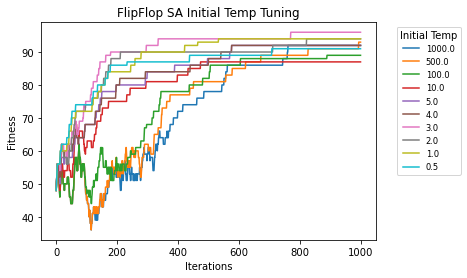

In [77]:
for i in range(len(sa_dict['curve'])):
    y = sa_dict['curve'][i]
    label = sa_dict['init_temp'][i]

    plt.plot(y, label=label)

plt.title("FlipFlop SA Initial Temp Tuning")
plt.ylabel("Fitness")
plt.xlabel("Iterations")
plt.legend(title='Initial Temp', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize='small', fancybox=True)
plt.show()

In [62]:
const = np.arange(0.001, .04, 0.005)

for temp in const:
    scheduleNew = mlrose.ExpDecay(init_temp= 10, exp_const = temp, min_temp = 0.001)
    
    best_state, best_fitness = mlrose.simulated_annealing(problem=problem3, schedule = scheduleNew,
                                                   max_attempts = 100, max_iters = 1000,
                                                        random_state = 42)

    #print(best_state)

    print(best_fitness)

48.0
83.0
88.0
91.0
89.0
89.0
91.0
91.0


Max Attempts

In [17]:
max_attempts_list = [10, 100, 1000, 10000, 100000]

for num in max_attempts_list:
    
    best_state, best_fitness = mlrose.simulated_annealing(problem=problem3, schedule = scheduleG,
                                                   max_attempts = num, max_iters = 1000,
                                                        random_state = 42)

    #print(best_state)
    print(best_fitness)


88.0
92.0
92.0
92.0
92.0


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


Max Iters

In [18]:
max_iters_list = [10, 100, 1000, 10000, 100000]

for num in max_iters_list:
    
    best_state, best_fitness = mlrose.simulated_annealing(problem=problem3, schedule = scheduleG,
                                                   max_attempts = 10, max_iters = num,
                                                        random_state = 42)
    
    #print(best_state)
    print(best_fitness)


56.0
74.0
88.0
88.0
88.0


##### Genetic Alg

In [19]:
best_state, best_fitness = mlrose.genetic_alg(problem=problem3, 
                                              pop_size = 200, mutation_prob = 0.1,
                                              max_attempts = 10, max_iters = 1000,
                                               random_state = 42)


print(best_fitness)

71.0


pop_size

In [81]:
pop_size_list = [.10, .25, .50, .75, 1.0, 1.50, 2.0, 2.50, 3.0, 5.0, 7.5, 10]
problem_length = problem3.length

for num in pop_size_list:
    size =  problem_length*num
    best_state, best_fitness = mlrose.genetic_alg(problem=problem3, 
                                                  pop_size = int(size), mutation_prob = 0.1,
                                                   max_attempts = 10, max_iters = 1000,
                                                        random_state = 42)

    print("pop_size:", size, " best_fitness:", best_fitness)


pop_size: 10.0  best_fitness: 64.0
pop_size: 25.0  best_fitness: 64.0
pop_size: 50.0  best_fitness: 67.0
pop_size: 75.0  best_fitness: 66.0
pop_size: 100.0  best_fitness: 66.0
pop_size: 150.0  best_fitness: 67.0
pop_size: 200.0  best_fitness: 71.0
pop_size: 250.0  best_fitness: 68.0
pop_size: 300.0  best_fitness: 66.0
pop_size: 500.0  best_fitness: 67.0
pop_size: 750.0  best_fitness: 71.0
pop_size: 1000  best_fitness: 68.0


mutation_prob

In [21]:
mutation_prob_list = np.arange(0.1, 1, 0.1) 

for num in mutation_prob_list:
    best_state, best_fitness = mlrose.genetic_alg(problem=problem3, 
                                                  pop_size = 200, mutation_prob = num,
                                                   max_attempts = 10, max_iters = 1000,
                                                        random_state = 42)

    print("mutation_prob:", num, "best_fitness:", best_fitness)

mutation_prob: 0.1 best_fitness: 71.0
mutation_prob: 0.2 best_fitness: 69.0
mutation_prob: 0.30000000000000004 best_fitness: 67.0
mutation_prob: 0.4 best_fitness: 65.0
mutation_prob: 0.5 best_fitness: 65.0
mutation_prob: 0.6 best_fitness: 69.0
mutation_prob: 0.7000000000000001 best_fitness: 69.0
mutation_prob: 0.8 best_fitness: 69.0
mutation_prob: 0.9 best_fitness: 68.0


max_iters

In [26]:
max_iters_list = [10, 100, 1000, 10000, 100000]

for num in max_iters_list:
    best_state, best_fitness = mlrose.genetic_alg(problem=problem3, 
                                                  pop_size = 2*problem3.length, mutation_prob = 0.1,
                                                   max_attempts = 10, max_iters = num,
                                                        random_state = 42)

    print("max_iters:",num ," best_fitness:", best_fitness)


max_iters: 10  best_fitness: 66.0
max_iters: 100  best_fitness: 71.0
max_iters: 1000  best_fitness: 71.0
max_iters: 10000  best_fitness: 71.0
max_iters: 100000  best_fitness: 71.0


max_attempts

In [28]:
max_attempts_list = [10, 100, 1000, 10000, 100000]

for num in max_attempts_list:
    best_state, best_fitness = mlrose.genetic_alg(problem=problem3, 
                                                  pop_size = 2*problem3.length, mutation_prob = 0.2,
                                                   max_attempts = num, max_iters = 1000,
                                                    random_state = 42)

    print("max_attempts",num ," best_fitness:", best_fitness)


max_attempts 10  best_fitness: 69.0
max_attempts 100  best_fitness: 69.0
max_attempts 1000  best_fitness: 72.0
max_attempts 10000  best_fitness: 72.0
max_attempts 100000  best_fitness: 72.0


##### Mimic 

keep_pct

In [24]:
keep_pct_list = np.arange(0.1, 1, 0.1) 

for num in keep_pct_list:
    best_state, best_fitness = mlrose.mimic(problem=problem3, 
                                                  pop_size = 200, keep_pct = num,
                                                   max_attempts = 10, max_iters = 1000,
                                                        random_state = 42)

    print("keep_pct:", num," best_fitness:",best_fitness)

keep_pct: 0.1  best_fitness: 87.0
keep_pct: 0.2  best_fitness: 86.0
keep_pct: 0.30000000000000004  best_fitness: 83.0
keep_pct: 0.4  best_fitness: 89.0
keep_pct: 0.5  best_fitness: 84.0
keep_pct: 0.6  best_fitness: 83.0
keep_pct: 0.7000000000000001  best_fitness: 89.0
keep_pct: 0.8  best_fitness: 69.0
keep_pct: 0.9  best_fitness: 68.0


pop_size

In [29]:
pop_size_list = [.10, .25, .50, .75, 1.0, 1.50, 2.0, 2.50, 3.0, 5.0]
problem_length = problem3.length


for num in pop_size_list:
    size =  num * problem_length
    
    best_state, best_fitness = mlrose.mimic(problem=problem3, 
                                                  pop_size = int(size), keep_pct = 0.40,
                                                   max_attempts = 10, max_iters = 1000,
                                                        random_state = 42)


    print("pop_size:", size, " best_fitness:",best_fitness)

pop_size: 10.0  best_fitness: 67.0
pop_size: 25.0  best_fitness: 67.0
pop_size: 50.0  best_fitness: 74.0
pop_size: 75.0  best_fitness: 82.0
pop_size: 100.0  best_fitness: 80.0
pop_size: 150.0  best_fitness: 87.0
pop_size: 200.0  best_fitness: 89.0
pop_size: 250.0  best_fitness: 88.0
pop_size: 300.0  best_fitness: 94.0
pop_size: 500.0  best_fitness: 93.0


In [79]:
pop_size_list = [7.5, 10]
problem_length = problem3.length


for num in pop_size_list:
    size =  num * problem_length
    
    best_state, best_fitness = mlrose.mimic(problem=problem3, 
                                                  pop_size = int(size), keep_pct = 0.40,
                                                   max_attempts = 10, max_iters = 1000,
                                                        random_state = 42)


    print("pop_size:", size, " best_fitness:",best_fitness)

pop_size: 750.0  best_fitness: 95.0
pop_size: 1000  best_fitness: 98.0


max_iters

In [30]:
#max_iters_list = [10, 100, 1000, 10000, 100000]
max_iters_list = [10, 100, 1000, 10000]

for num in max_iters_list:
    
    best_state, best_fitness = mlrose.mimic(problem=problem3, 
                                              pop_size = problem3.length*5, keep_pct = 0.40,
                                               max_attempts = 10, max_iters = int(num),
                                                    random_state = 42)


    print("max_iters:", num, " best_fitness:",best_fitness)


max_iters: 10  best_fitness: 78.0
max_iters: 100  best_fitness: 93.0
max_iters: 1000  best_fitness: 93.0
max_iters: 10000  best_fitness: 93.0


max_attempts

In [31]:
#max_attempts_list = [10, 100, 1000, 10000, 100000]
max_attempts_list = [10, 100, 1000, 10000]

for num in max_attempts_list:
    
    best_state, best_fitness = mlrose.mimic(problem=problem3, 
                                              pop_size = problem3.length*5, keep_pct = 0.40,
                                               max_attempts = int(num), max_iters = 1000,
                                                    random_state = 42)


    print("max_attempts:", num, " best_fitness:",best_fitness)
    

max_attempts: 10  best_fitness: 93.0
max_attempts: 100  best_fitness: 93.0
max_attempts: 1000  best_fitness: 93.0


KeyboardInterrupt: 